In [1]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

In [2]:
## Data Directory GUI
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root.withdraw() # closes the tkinter window since it's unnecessary
oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root.directory) # sets new directory
newcwd = os.getcwd() # saves new directory name as newcwd

In [3]:
## Load Data
''' Open data and set up for analysis'''
path = root.directory + '/*.csv' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
file_shape = np.array(pd.read_csv(glob.glob(path)[0]).values.shape) # data file size
Header = 4 #Removes string header to work with numpy array
file_shape[0]=file_shape[0]-Header # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname) # uses pandas to open files and keep structure
    data=data.drop(data.index[0:Header]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [53]:
file_list

['C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Cable1.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Cable2.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port1A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port1B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port2A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port2B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port3A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port3B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port4A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port4B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port5A.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port5B.csv',
 'C:/Users/kbs1/Documents/TEMCombs_baseline/TEMCombs_baseline\\Port6A.csv',
 'C:/Users/k

In [54]:
for_counter = np.arange(2,num_files-2,2)
a=0
num_cables=7
new_file_shape=file_shape[1]-1
new_file_shape=np.append(file_shape[0],new_file_shape)
cable_data_matrix = np.append(new_file_shape,num_cables)
data_A_1=np.empty(cable_data_matrix)
data_A_2=np.empty(cable_data_matrix)
data_B_1=np.empty(cable_data_matrix)
data_B_2=np.empty(cable_data_matrix)
for counter in for_counter:
   
   data_A_1[:,0,a]=data_array[:,0,counter]
   data_A_2[:,0,a]=data_array[:,0,counter]
   data_A_1[:,1,a]=data_array[:,1,counter]-data_array[:,1,0]
   data_A_2[:,1,a]=data_array[:,1,counter]-data_array[:,1,1]
   data_B_1[:,0,a]=data_array[:,0,counter+1]
   data_B_2[:,0,a]=data_array[:,0,counter+1]
   data_B_1[:,1,a]=data_array[:,1,counter+1]-data_array[:,1,0]
   data_B_2[:,1,a]=data_array[:,1,counter+1]-data_array[:,1,1]
   a+=1
    


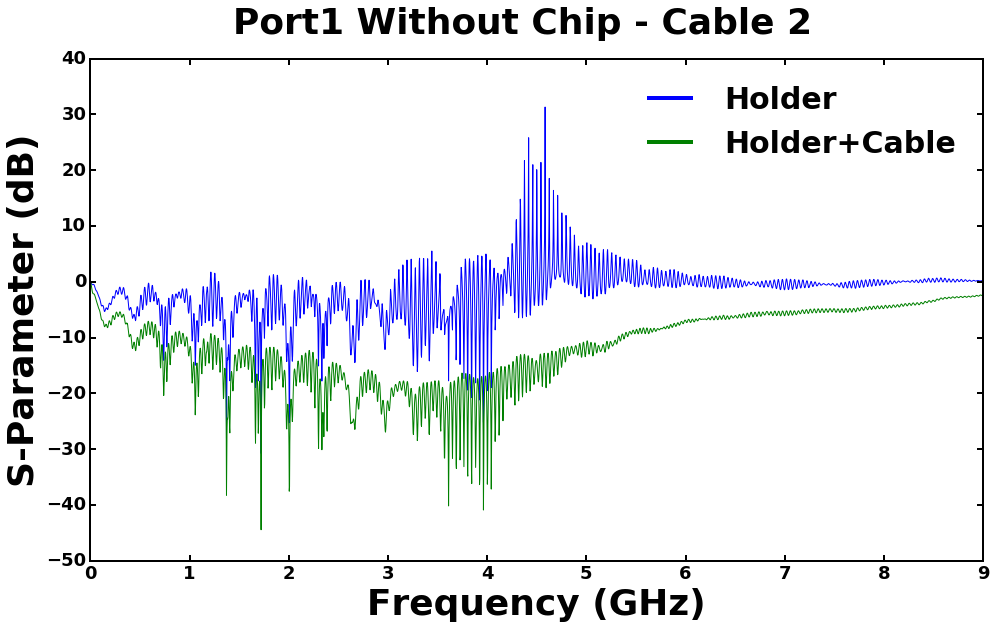

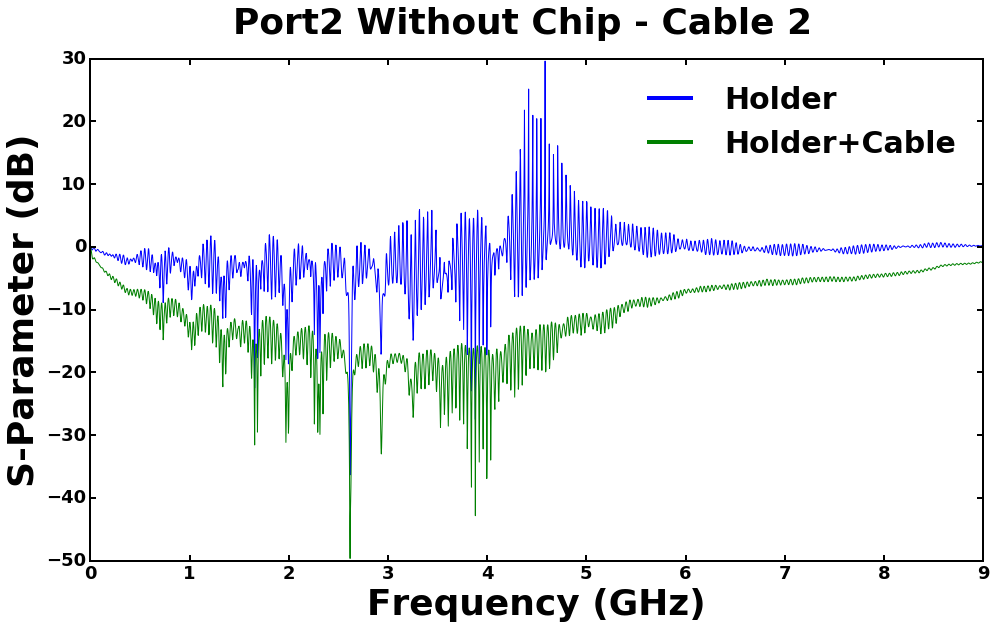

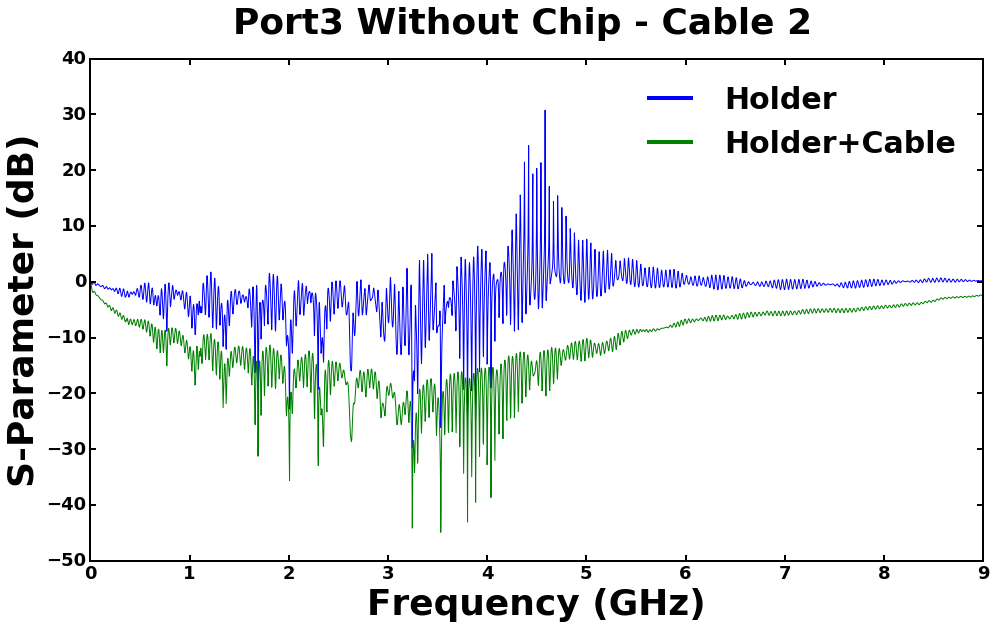

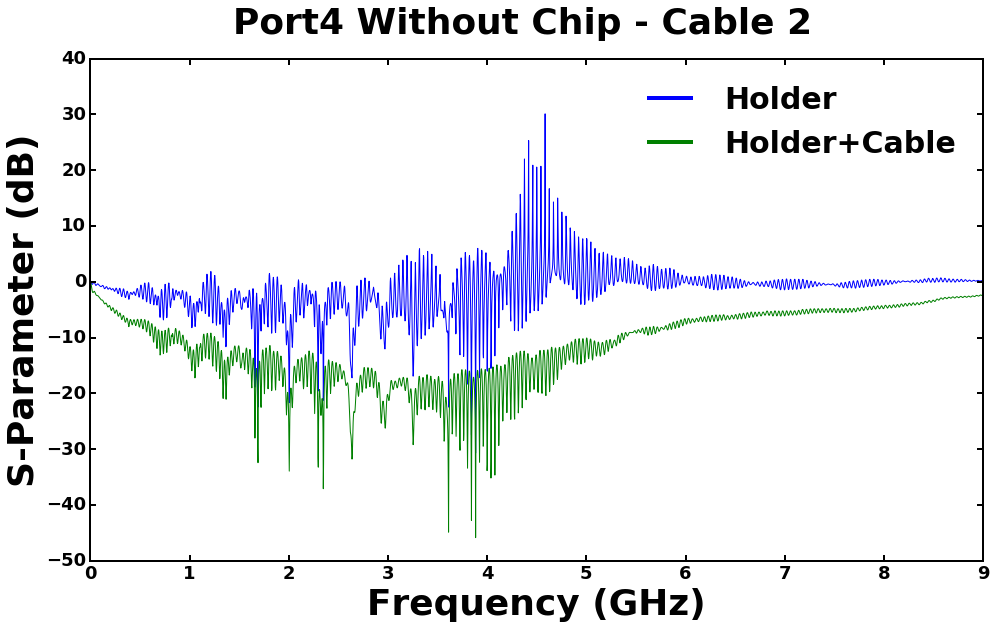

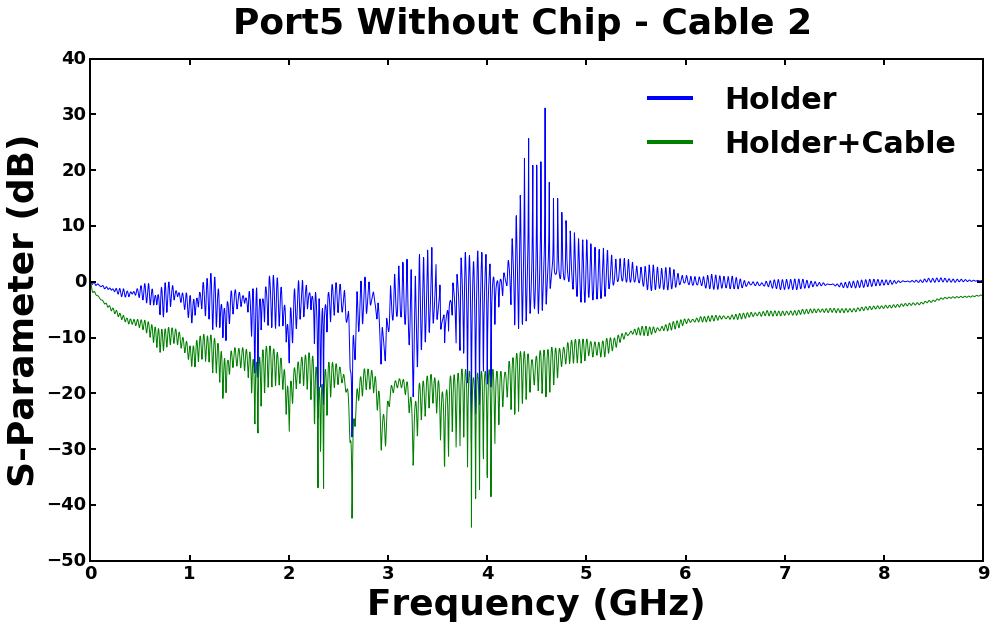

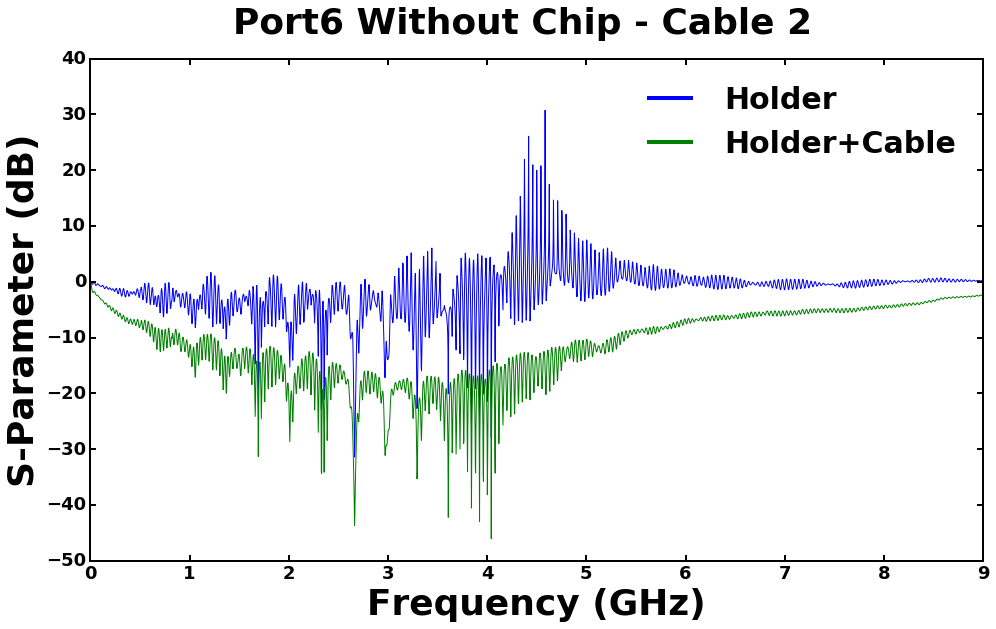

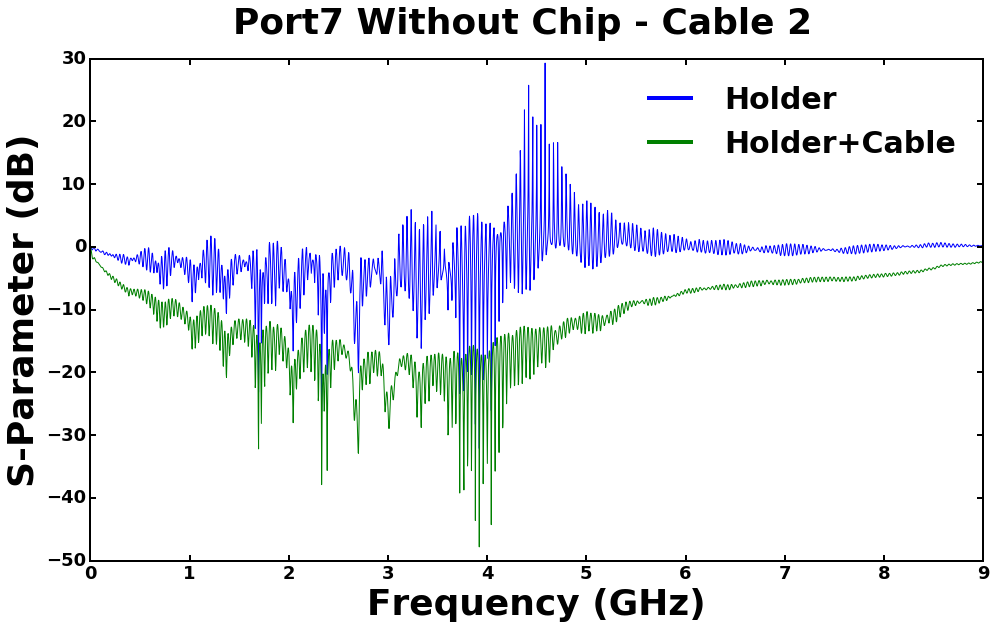

In [151]:
plot_file=np.arange(0,7)
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
for n in plot_file:
    x=data_array[:,0,data_array_order[n]]
    y=data_array[:,1,data_array_order[n]]

    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    
    X=data_B_2[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    Y=data_B_2[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    name_fix=plot_file[n]+1
    plot_file_name=str(name_fix)
    Data_Name = 'Port' + plot_file_name + ' Without Chip - Cable 2' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('S-Parameter (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    fig=plt.plot(X,Y,'b-',label='Holder')
    fig=plt.plot(x,y,'g-',label='Holder+Cable')

    leg=plt.legend(fontsize=30, loc='best', frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    #plt.show()
    save_loc=root.directory+'/'+Data_Name+'.png'
    plt.savefig(save_loc)